# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

83


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating lists to hold values to later populate dataframe
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
countries =  []
dates = []
skip_counter = 0

#Beginning of print process
print("Beginning Data Retrieval")
print("------------------------------")

#Loop through each city in cities and generate json link to pull data
for name in cities:
    weather_url = f"https://api.openweathermap.org/data/2.5/weather?q={name}&appid={weather_api_key}&units=imperial"
    response = requests.get(weather_url).json()

    #Catch exception in case no data found for selected city
    try:
        #Store data into variables
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]

        #Append data to corresponding lists
        lats.append(lat)
        lons.append(lon)
        max_temps.append(max_temp)
        humidities.append(humidity)
        clouds.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)

        #Print log of city being processed
        print(f"Processing record {cities.index(name)} | {name.capitalize()}")
        print(f"Data visual: {len(lats)}\n")
    except KeyError:
        print(f"No data found for {name.capitalize()}. Skipping...")

        #Remove city from cities list for easier dataframe creation later
        #cities.remove(name)
        lats.append("")
        lons.append("")
        max_temps.append("")
        humidities.append("")
        clouds.append("")
        wind_speeds.append("")
        countries.append("")
        dates.append("")
        print(f"Data visual: {len(lats)}\n")
        skip_counter += 1

#End of print process
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

print(f"Number of Skips: {skip_counter}")

Beginning Data Retrieval
------------------------------
Processing record 0 | Uthal
Data visual: 1

Processing record 1 | Jamestown
Data visual: 2

Processing record 2 | Hermanus
Data visual: 3

Processing record 3 | Sangar
Data visual: 4

Processing record 4 | Avera
Data visual: 5

Processing record 5 | Saskylakh
Data visual: 6

Processing record 6 | Urumqi
Data visual: 7

Processing record 7 | Mataura
Data visual: 8

Processing record 8 | Vaini
Data visual: 9

Processing record 9 | Pilot butte
Data visual: 10

Processing record 10 | Silopi
Data visual: 11

Processing record 11 | Ushuaia
Data visual: 12

Processing record 12 | Cidreira
Data visual: 13

Processing record 13 | Mount gambier
Data visual: 14

Processing record 14 | Albany
Data visual: 15

Processing record 15 | Pasighat
Data visual: 16

Processing record 16 | Dongsheng
Data visual: 17

Processing record 17 | Puerto ayora
Data visual: 18

Processing record 18 | Chuy
Data visual: 19

Processing record 19 | Vardo
Data visual

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe
raw_data = {"City": cities, "Lat": lats, "Lon": lons, "Max Temp": max_temps, "Humidity": humidities, "Cloudiness": clouds, "Wind Speed": wind_speeds, "Country": countries, "Date": dates}

city_data = pd.DataFrame(raw_data)

#Find indexes where Lat is blank for future removal
index_names = city_data[city_data["Lat"] == ""].index

city_data.drop(index_names, inplace = True)

#Export dataframe to a csv file
city_data.to_csv("../output_data/cities.csv", index = False, header = True)

#Print out cleaned dataframe
city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uthal,25.81,66.62,84.04,14,5,1.86,PK,1602790632
1,jamestown,42.1,-79.24,55.99,76,90,13.87,US,1602790447
2,hermanus,-34.42,19.23,55.99,88,100,1.01,ZA,1602790632
3,sangar,63.92,127.47,19.2,96,100,7.2,RU,1602790632
4,avera,33.19,-82.53,82.4,69,40,4.7,US,1602790633
...,...,...,...,...,...,...,...,...,...
78,bambous virieux,-20.34,57.76,75,83,40,8.05,MU,1602790655
79,tiksi,71.69,128.87,20.17,98,95,0.89,RU,1602790655
80,provideniya,64.38,-173.3,44.6,93,90,17.9,RU,1602790655
81,karratha,-20.74,116.85,74.03,38,0,8.55,AU,1602790415


In [5]:
over_100 = city_data.loc[city_data["Humidity"] > 100]

over_100

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_index = city_data[city_data["Humidity"] > 100].index
humid_index

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(humid_index, inplace = False)

clean_city_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uthal,25.81,66.62,84.04,14,5,1.86,PK,1602790632
1,jamestown,42.1,-79.24,55.99,76,90,13.87,US,1602790447
2,hermanus,-34.42,19.23,55.99,88,100,1.01,ZA,1602790632
3,sangar,63.92,127.47,19.2,96,100,7.2,RU,1602790632
4,avera,33.19,-82.53,82.4,69,40,4.7,US,1602790633
...,...,...,...,...,...,...,...,...,...
78,bambous virieux,-20.34,57.76,75,83,40,8.05,MU,1602790655
79,tiksi,71.69,128.87,20.17,98,95,0.89,RU,1602790655
80,provideniya,64.38,-173.3,44.6,93,90,17.9,RU,1602790655
81,karratha,-20.74,116.85,74.03,38,0,8.55,AU,1602790415


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

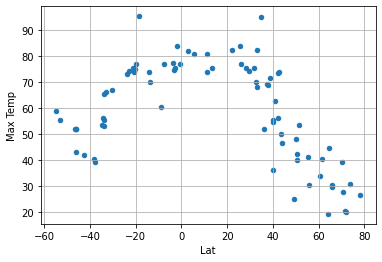

In [8]:
lat_vs_temp = clean_city_data.plot(kind = "scatter", x = "Lat", y = "Max Temp", grid = True)
plt.xlabel = "Latitude"
plt.ylabel = "Max Temperature (F)"
plt.title = "Latitude vs Max Temp (F)"
plt.savefig = "../output_data/Latitude vs Max Temp.png"
plt.show()

## Latitude vs. Humidity Plot

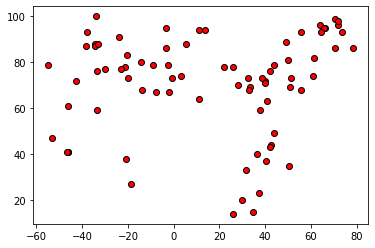

In [9]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Humidity"
plt.xlabel = "Latitude"
plt.ylabel ="Humidity"
plt.savefig = "Latitude vs Humidity.png"
plt.show()

## Latitude vs. Cloudiness Plot

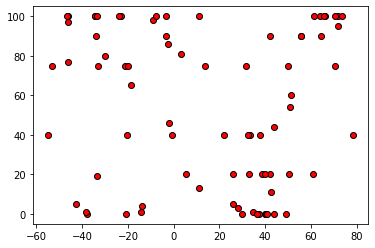

In [10]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Cloudiness"
plt.xlabel = "Latitude"
plt.ylabel = "Cloudiness"
plt.savefig = "../output_data/Latitude vs Cloudiness.png"
plt.show() 

## Latitude vs. Wind Speed Plot

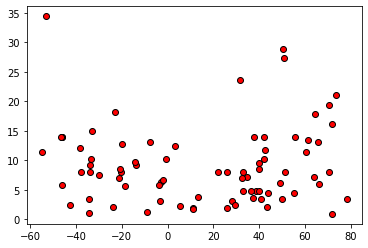

In [11]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker = "o", facecolors = "red", edgecolors = "black")
plt.title = "Latitude vs Wind Speed"
plt.xlabel = "Latitude"
plt.ylabel = "Wind Speed"
plt.savefig = "../output_data/Latitude vs Wind Speed.png"
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7585562640942914


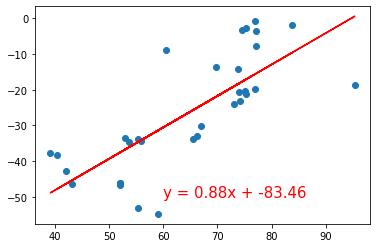

In [12]:
north_index = clean_city_data[clean_city_data["Lat"] > 0].index
north_city_data = clean_city_data.drop(north_index, inplace= False)

x_values = north_city_data["Max Temp"]
y_values = north_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (60, -50), fontsize = 15, color = "red")
plt.title = "Max Temp vs. Latitude (Northern Hemisphere)"
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8604477490314781


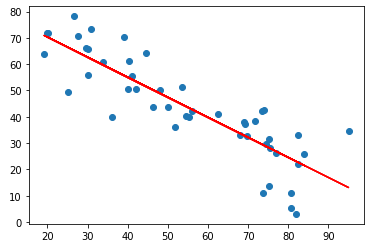

In [13]:
south_index = clean_city_data[clean_city_data["Lat"] < 0].index
south_city_data = clean_city_data.drop(south_index, inplace = False)

x_values = south_city_data["Max Temp"]
y_values = south_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (10, 10), fontsize = 15, color = "red")
plt.title = "Max Temp vs. Latitude (Southern Hemisphere)"
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23919846108888163


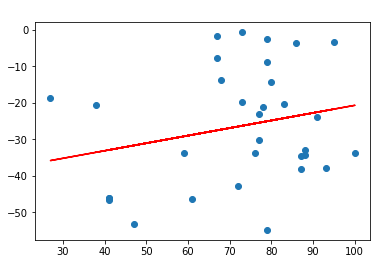

In [14]:
x_values = north_city_data["Humidity"]
y_values = north_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (60, 3), fontsize = 15, color = "red")
plt.title = "Humidity (%) vs. Latitude (Northern Hemisphere)"
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.35890121211523884


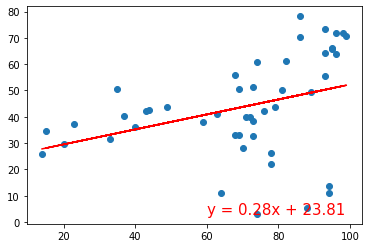

In [15]:
x_values = south_city_data["Humidity"]
y_values = south_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (60, 3), fontsize = 15, color = "red")
plt.title = "Humidity (%) vs Latitude (Southern Hemisphere)"
plt.xlabel = "Humidity"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Humidity vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.005873146639076723


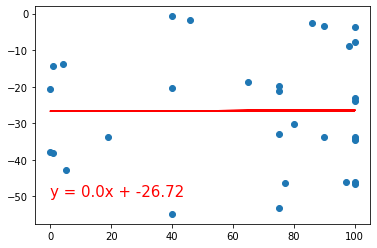

In [16]:
x_values = north_city_data["Cloudiness"]
y_values = north_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (0, -50), fontsize = 15, color = "red")
plt.title = "Cloudiness (%) vs Latitude (Northern Hemisphere)"
plt.xlabel = "Cloudiness (%)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Max Temp vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.4421282455405689


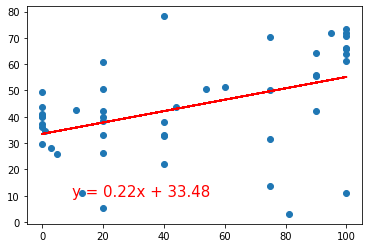

In [17]:
x_values = south_city_data["Cloudiness"]
y_values = south_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (10, 10), fontsize = 15, color = "red")
plt.title = "Cloudiness (%) vs Latitude (Southern Hemisphere)"
plt.xlabel = "Max Temp (F)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Cloudiness vs Latitude (South Hemisphere)"
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3754010429106278


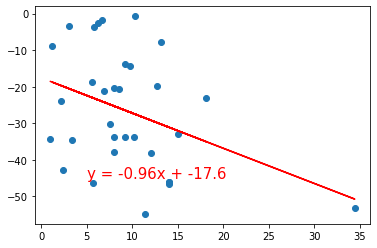

In [18]:
x_values = north_city_data["Wind Speed"]
y_values = north_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (5, -45), fontsize = 15, color = "red")
plt.title = "Wind Speed (mph) vs. Latitude (Northern Hemisphere)"
plt.xlabel = "Wind Speed (mph)"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (North Hemisphere).png"
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.3332799646089599


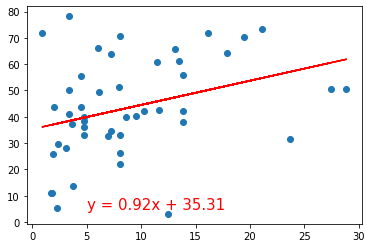

In [19]:
x_values = south_city_data["Wind Speed"]
y_values = south_city_data["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is: {rvalue}")
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (5, 5), fontsize = 15, color = "red")
plt.title = "Wind Speed (mph) vs. Latitude (Southern Hemisphere)"
plt.xlabel = "Wind Speed"
plt.ylabel = "Latitude"
plt.savefig = "../output_data/Wind Speed vs Latitude (South Hemisphere).png"
plt.show()